In [1]:
!conda env list

# conda environments:
#
base                     E:\Anaconda3\Install
backend                  E:\Anaconda3\Install\envs\backend
cvt                      E:\Anaconda3\Install\envs\cvt
pytorch               *  E:\Anaconda3\Install\envs\pytorch
tensorflow               E:\Anaconda3\Install\envs\tensorflow
                         E:\Oriange3



## Show Image

(512, 512, 3)


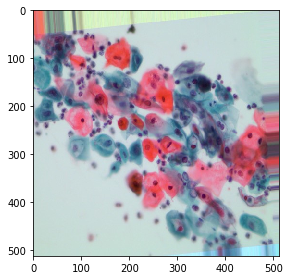

In [2]:
train_root  = "E:\\NTUAILab\\Data\\224_224_CervicalCancerScreening\\kaggle\\train\\train"
test_root = "E:\\NTUAILab\\Data\\224_224_CervicalCancerScreening\\kaggle\\test\\test"

#if wanted to display image 
from skimage import io
image = io.imread("E:\\NTUAILab\\Data\\MultiCancerDataset\\Multi Cancer\\Cervical Cancer\\cervix_dyk\\cervix_dyk_0001.jpg")
print(image.shape)
io.imshow(image)

In [3]:
%matplotlib inline
import os
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import sys
from PIL import Image
import matplotlib.pyplot as plt

E:\Anaconda3\Install\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'E:\Anaconda3\Install\envs\pytorch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [4]:
# Set the currently used GPU device to device 0 only
os.environ["CUDA_VISIBLE_DEVICES"] = "0"   

# Define the device, and whether to use GPU will be automatically selected according to the computer configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Data Augmentation

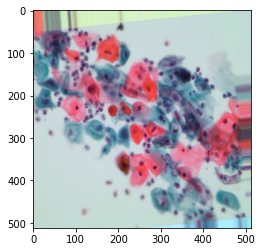

In [5]:
img = Image.open('E:\\NTUAILab\\Data\\MultiCancerDataset\\Multi Cancer\\Cervical Cancer\\cervix_dyk\\cervix_dyk_0001.jpg')
plt.imshow(img)

Define the drawing function show_ images

In [6]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

Run the image augmentation method Aug multiple times for the input image img and show all the results

In [7]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

### Flip and crop

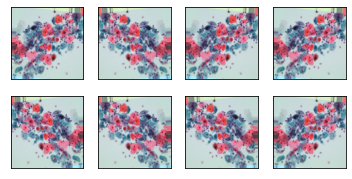

In [8]:
# Flip left and right
apply(img, torchvision.transforms.RandomHorizontalFlip())

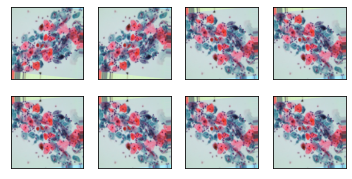

In [9]:
# upside down
apply(img, torchvision.transforms.RandomVerticalFlip())

Randomly cut an area with an area of 10% to 100% of the original area, and the ratio of width to height of the area is randomly taken from 0.5 ∼ 2, and then scale the width and height of the area to 200 pixels respectively

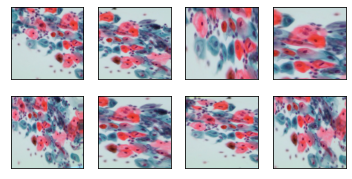

In [10]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

### Change Color

Change the color of the image from four aspects: brightness, contrast, saturation and hue

Randomly change the brightness of the image to 50% (1 - 0.5) - 150% (1 + 0.5) of the brightness of the original image

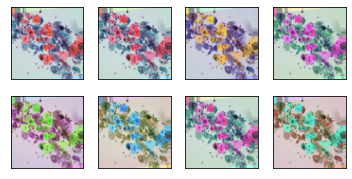

In [11]:
apply(img, torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5))

### A method of superimposing multiple images for augmentation

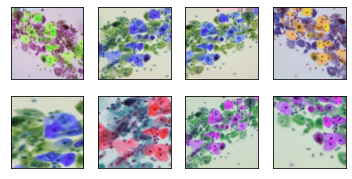

In [12]:
color_aug = torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5)
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

## Model

### Dataset